In [2]:
!pip install torch torchvision

    100% |████████████████████████████████| 61kB 2.5MB/s 
    100% |████████████████████████████████| 2.0MB 4.3MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets
import torchvision.transforms as T
import matplotlib.pylab as plt

In [0]:
train_dataset = torchvision.datasets.MNIST('data', train=True, download=True,
                                           transform=T.ToTensor())
valid_dataset = torchvision.datasets.MNIST('data', train=False, download=True,
                                           transform=T.ToTensor())

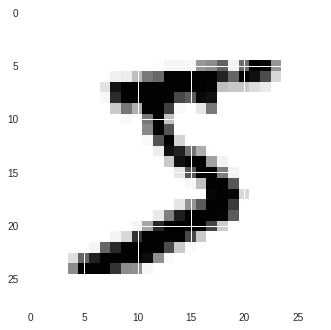

In [8]:
img, target = train_dataset[0]
plt.imshow(img[0])

In [0]:
class args:
  batch_size = 128

device = torch.device('cuda')

In [0]:
class LeNet5(nn.Module):
  # Based on http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, kernel_size=5, padding=2)
    self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
    self.fc1 = nn.Linear(400, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    
  def forward(self, x):
    x = torch.tanh(F.max_pool2d(self.conv1(x), kernel_size=2))
    x = torch.tanh(F.max_pool2d(self.conv2(x), kernel_size=2))
    x = x.reshape(-1, 16 * 5 * 5)
    x = torch.tanh(self.fc1(x))
    x = torch.tanh(self.fc2(x))
    x = torch.tanh(self.fc3(x))
    return F.log_softmax(x, dim=1)

In [0]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=args.batch_size,
                                           shuffle=False)

model = LeNet5().to(device)
optimizer = torch.optim.Adam(model.parameters())
for epoch in range(10):
  model.train()
  for i, (batch_input, batch_target) in enumerate(train_loader):
    output = model(batch_input.to(device))
    loss = F.nll_loss(output, batch_target.to(device))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 200 == 0:
      print(epoch, loss.item())

Accuracy:  98.53


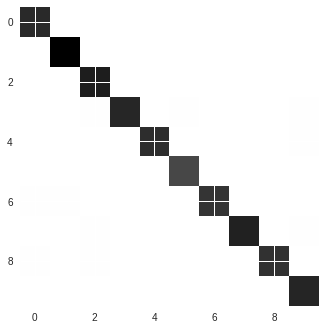

In [16]:
import sklearn.metrics 
valid_loader = torch.utils.data.DataLoader(valid_dataset,
                                           batch_size=args.batch_size,
                                           shuffle=False)
model.eval()
num_matches = 0
true_labels, pred_labels = [], []
with torch.no_grad():
  for batch_input, batch_target in valid_loader:
    output = model(batch_input)
    pred = output.argmax(1)
    num_matches += (pred == batch_target).sum().item()
    true_labels.append(batch_target)
    pred_labels.append(pred)
    
true_labels = torch.cat(true_labels, dim=0)
pred_labels = torch.cat(pred_labels, dim=0)
conf_matrix = sklearn.metrics.confusion_matrix(true_labels, pred_labels)
plt.imshow(conf_matrix)

print('Accuracy: ', num_matches / len(valid_dataset) * 100)